In [1]:
from google.colab import files
uploaded=files.upload()

Saving archive (1).zip to archive (1).zip


In [3]:
!unzip "archive (1).zip"

Archive:  archive (1).zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating

In [4]:
!ls

'archive (1).zip'   flowers   sample_data


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training',
        classes=['daisy', 'sunflower'])

Found 1199 images belonging to 2 classes.


In [8]:
validation_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        classes=['daisy', 'sunflower'])

Found 298 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
37/37 [==============================] - 81s 2s/step - loss: 0.4849 - accuracy: 0.7772 - val_loss: 0.3100 - val_accuracy: 0.8785
Epoch 2/10
37/37 [==============================] - 64s 2s/step - loss: 0.3015 - accuracy: 0.8757 - val_loss: 0.3041 - val_accuracy: 0.8819
Epoch 3/10
37/37 [==============================] - 58s 2s/step - loss: 0.2815 - accuracy: 0.8895 - val_loss: 0.2823 - val_accuracy: 0.8889
Epoch 4/10
37/37 [==============================] - 57s 2s/step - loss: 0.2584 - accuracy: 0.8963 - val_loss: 0.3119 - val_accuracy: 0.8854
Epoch 5/10
37/37 [==============================] - 58s 2s/step - loss: 0.2183 - accuracy: 0.9075 - val_loss: 0.2975 - val_accuracy: 0.8785
Epoch 6/10
37/37 [==============================] - 58s 2s/step - loss: 0.1870 - accuracy: 0.9314 - val_loss: 0.2550 - val_accuracy: 0.9097
Epoch 7/10
37/37 [==============================] - 57s 2s/step - loss: 0.1800 - accuracy: 0.9314 - val_loss: 0.2810 - val_accuracy: 0.9167
Epoch 8/10
37/37 [==

In [12]:
model.save('trained_model_flowers.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

# Load and preprocess the image using OpenCV
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [14]:
# Function to display image using OpenCV
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

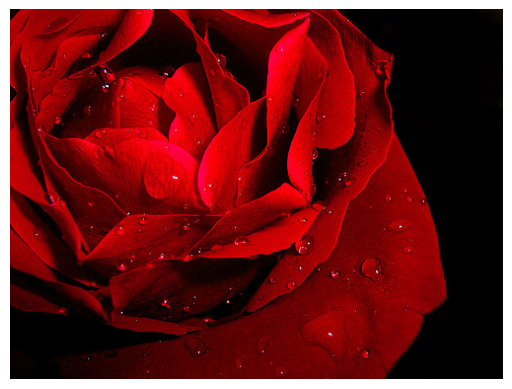

1/1 [==============================] - 0s 45ms/step


In [24]:
# Testing the model with a sample image (sunflower)
sample_image_path = 'flowers/rose/353897245_5453f35a8e.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [25]:
# prediction
if prediction < 0.5:
    print("Rose")
else:
    print("Daisy")

Rose


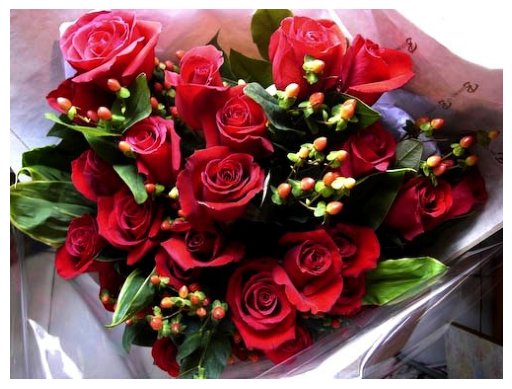

1/1 [==============================] - 0s 40ms/step


In [26]:
# Again Testing the model with a sample image (sunflower)
sample_image_path = 'flowers/rose/2607130050_9c34310004.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [27]:
# prediction
if prediction > 0.5:
    print("Rose")
else:
    print("Daisy")

Rose


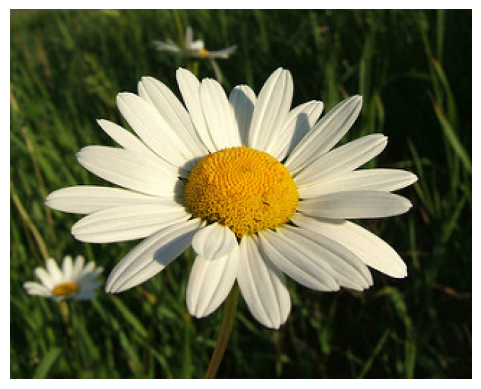

1/1 [==============================] - 0s 35ms/step


In [29]:
# Testing the model with a sample image(daisy)
sample_image_path = 'flowers/daisy/162362896_99c7d851c8_n.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [30]:
# prediction
if prediction > 0.5:
    print("Rose")
else:
    print("Daisy")

Daisy


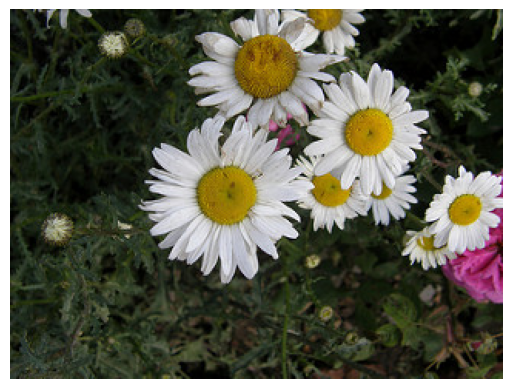

1/1 [==============================] - 0s 40ms/step


In [33]:
# Again Testing the model with a sample image
sample_image_path = 'flowers/daisy/2536529152_33ef3ee078_n.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [34]:
# prediction
if prediction > 0.5:
    print("Rose")
else:
    print("Daisy")

Daisy


In [35]:
model.save('trained_model_flowers.h5')